In [ ]:
'''

'''

In [ ]:
'''
    - NLTK -- for tokenezing russian texts of election programs
    
    - (LINK!!) -- for creating matrix of program_x_term
    - sklearn -- for clustering...
'''

In [ ]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt




# 0. Pre-defining functions

In [ ]:
# to find n-th occurance of substring in the string (n = 0,1...)

def find_substring(txt, str1, n):
    parts = txt.split(str1, n + 1)
    if len(parts) <= n + 1:
        return -1
    return len(txt) - len(parts[-1]) - len(str1)

In [461]:
programs_df = pd.read_csv('../library: main/ssmm_elections_candidates_1_11.csv', sep='\t', encoding='utf-8')
programs_df = programs_df[['conv_x_name','name','program_txt','convocation_no']][programs_df['program_txt'].notna()].reset_index().drop(['index'],axis=1)
programs_df.head()


,conv_x_name,name,program_txt,convocation_no
0,1_Левин_Андрей,Левин Андрей,Активный участник и организатор различных меро...,1
1,1_Кириллова_Полина,Кириллова Полина,Мне нравится заниматься общественной деятельно...,1
2,1_Семенов_Павел,Семенов Павел,"""Здравствуйте. Я так понимаю, что я уже поздно...",1
3,1_Кузнецова_Алёна,Кузнецова Алёна,"""Меня очень интересует жизнь Университета. я б...",1
4,1_Кунденко_Вадим,Кунденко Вадим,""" Добрый день! Пару слов о себе. Путь к мехм...",1


In [462]:
core_df = pd.read_csv('../library: main/ssmm_candidates_core.csv', sep='\t', encoding='utf-8')
core_df = core_df[['name','min_member_conv_no','min_cand_conv_no']].reset_index().drop(['index'],axis=1)
core_df = core_df.fillna(0)
core_df.head()


,name,min_member_conv_no,min_cand_conv_no
0,Владыкина Вероника Евгеньевна,1.0,1
1,Коновалов Антон Александрович,1.0,1
2,Ласкин Алексей Александрович,1.0,1
3,Малхасян Арамаис,1.0,1
4,Попов Леонид Андреевич,1.0,1


In [463]:
person_clusters_df = pd.read_csv('person_clusters.csv', sep='\t', encoding='utf-8')
person_clusters_df = person_clusters_df[['key','cluster']]
person_clusters_df = person_clusters_df.rename(columns={'key':'name'})
person_clusters_df.head()

,name,cluster
0,Владыкина Вероника Евгеньевна,4
1,Коновалов Антон Александрович,1
2,Ласкин Алексей Александрович,1
3,Малхасян Арамаис,2
4,Попов Леонид Андреевич,4


In [467]:
programs_df_2 = programs_df.merge(core_df, on='name', how='left')

# interested in: True / False
programs_df_2['first_nomination_flg'] = programs_df_2['convocation_no'] == programs_df_2['min_cand_conv_no']
# interested in: False
programs_df_2['first_membership_flg'] = programs_df_2['convocation_no'] == programs_df_2['min_member_conv_no']

programs_df_2.head()

,conv_x_name,name,program_txt,convocation_no,min_member_conv_no,min_cand_conv_no,first_nomination_flg,first_membership_flg
0,1_Левин_Андрей,Левин Андрей,Активный участник и организатор различных меро...,1,1.0,1,True,True
1,1_Кириллова_Полина,Кириллова Полина,Мне нравится заниматься общественной деятельно...,1,1.0,1,True,True
2,1_Семенов_Павел,Семенов Павел,"""Здравствуйте. Я так понимаю, что я уже поздно...",1,0.0,1,True,False
3,1_Кузнецова_Алёна,Кузнецова Алёна,"""Меня очень интересует жизнь Университета. я б...",1,1.0,1,True,True
4,1_Кунденко_Вадим,Кунденко Вадим,""" Добрый день! Пару слов о себе. Путь к мехм...",1,0.0,1,True,False


In [468]:
programs_df_2 = programs_df_2.merge(person_clusters_df, on='name', how='left')
programs_df_2.head()

,conv_x_name,name,program_txt,convocation_no,min_member_conv_no,min_cand_conv_no,first_nomination_flg,first_membership_flg,cluster
0,1_Левин_Андрей,Левин Андрей,Активный участник и организатор различных меро...,1,1.0,1,True,True,2
1,1_Кириллова_Полина,Кириллова Полина,Мне нравится заниматься общественной деятельно...,1,1.0,1,True,True,2
2,1_Семенов_Павел,Семенов Павел,"""Здравствуйте. Я так понимаю, что я уже поздно...",1,0.0,1,True,False,0
3,1_Кузнецова_Алёна,Кузнецова Алёна,"""Меня очень интересует жизнь Университета. я б...",1,1.0,1,True,True,2
4,1_Кунденко_Вадим,Кунденко Вадим,""" Добрый день! Пару слов о себе. Путь к мехм...",1,0.0,1,True,False,0


# 1. Loading data -- table of election programs

In [2]:
programs_df = pd.read_csv('../library: main/ssmm_elections_candidates_1_11.csv', sep='\t', encoding='utf-8')
programs_df = programs_df[['conv_x_name','program_txt','convocation_no']][programs_df['program_txt'].notna()].reset_index().drop(['index'],axis=1)

programs_df.head()


,conv_x_name,program_txt,convocation_no
0,1_Левин_Андрей,Активный участник и организатор различных меро...,1
1,1_Кириллова_Полина,Мне нравится заниматься общественной деятельно...,1
2,1_Семенов_Павел,"""Здравствуйте. Я так понимаю, что я уже поздно...",1
3,1_Кузнецова_Алёна,"""Меня очень интересует жизнь Университета. я б...",1
4,1_Кунденко_Вадим,""" Добрый день! Пару слов о себе. Путь к мехм...",1


In [418]:
# len(programs_df)

In [469]:
# programs_df = programs_df_2[programs_df_2['first_membership_flg'] == False]
programs_df = programs_df_2[programs_df_2['cluster'] == 4]


# limit = 91 # for convocations 1-3
limit = len(programs_df)

key_list = list(programs_df['conv_x_name'])[:limit]
# key_list[-5:]

program_list = list(programs_df['program_txt'])[:limit]

# 2. Tokenizing of texts

In [10]:
from nltk.tokenize import word_tokenize

In [14]:
import nltk
nltk.download('punkt')
# for russian text

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [94]:

# def remove_noise(text, stop_words = []):
#     tokens = word_tokenize(text, language="russian")
#     cleaned_tokens = []
#     for token in tokens:
#         token = re.sub('[^А-Яа-я]+', '', token)
#         if len(token) > 1 and token.lower() not in stop_words:
#             # Get lowercase
#             cleaned_tokens.append(token.lower())
#     return cleaned_tokens

# [^A-Za-z0-9]+

# remove_noise("Мне нравится заниматься общественной деятельностью.")

In [ ]:
# http://brandonrose.org/clustering#Stopwords,-stemming,-and-tokenizing

In [28]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('russian')
stopwords

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [370]:
# to add stopwords

stopwords += [
        'это', 'этим', 
        'моего',
        'свой', 'свои', 'своего', 'своей', 
        'всем', 'всё',
        'нашего', 
        'таких', 'также', 
        'поэтому', 'многие', 'очень', 'которые', 'других', 'которых'
    ] + [
        'являюсь', 
        'хотел', 'хотела', 'хочу', 'хотелось',
        'могу',
        'рассказ', 'школе', 
        'году', 'год', 'года',
        'зовут', 'привет', 'различных', 'надеюсь', 'считаю', 'просто', 'вообще'
    ] + [
        'мгу', 'университет', 'университета',
        'мехмата', 'мехмат', 'мехмате', 'факультета', 'факультете', 'факультет',
        'студсовета', 'студсовете', 'студсовет', 'совет', 'совета', 'совете',
        'студентов', 'студенты', 'студентам', 'студенческий', 'студенческого', 'студенческом',
        '2012',
        'организации', 'организацией', 'организация'
      ]


In [20]:
# Stemming is just the process of breaking a word down into its root.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [40]:
# sents = nltk.sent_tokenize('Мне нравится заниматься общественной деятельностью, всячески пытаюсь расширять свой кругозор. Еще в школе организовывала различные мероприятия и была сильно этим заинтересована', language="russian")
# print(sents)

# for sent in sents:
#     for word in nltk.word_tokenize(sent, language="russian"):
#         print(word)


In [378]:
#

def tokenize_and_stem(text, stopwords=stopwords, lang="russian"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text, stopwords, lang):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    return filtered_tokens



In [43]:
# for program in program_list:
#     print(tokenize_and_stem(program, stopwords, "russian"))

In [470]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in program_list:
    allwords_stemmed = tokenize_and_stem(i, stopwords, "russian")
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i, stopwords, "russian")
    totalvocab_tokenized.extend(allwords_tokenized)
    
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print(vocab_frame.shape[0])

4886


In [223]:
# vocab_frame

# Tf-idf and program similarity

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [58]:
# define vectorizer parameters
# tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
#                                  min_df=0.2, stop_words=stopwords,
#                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

# %time tfidf_matrix = tfidf_vectorizer.fit_transform(program_list) 

# print(tfidf_matrix.shape)

In [471]:
# alternative way, with own list of stop words
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

tfidf_vectorizer = TfidfVectorizer(
    max_features=200, 
    max_df=0.7, min_df=0.05, 
#     ngram_range=(1,1), 
    tokenizer=tokenize_and_stem, 
    stop_words=stopwords
)

tfidf_matrix = tfidf_vectorizer.fit_transform(program_list) # БЕРЕТСЯ ОРИГИНАЛЬНЫЙ ТЕКСТ, БЕЗ stemmed
# idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
terms = tfidf_vectorizer.get_feature_names_out()

print(tfidf_matrix.shape)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(82, 195)


In [424]:
# print(tfidf_matrix)

In [425]:
# tfidf_matrix.todense()

In [426]:
# terms

# K-Means

In [54]:
from sklearn.cluster import KMeans

In [444]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters, n_init=10)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 69.2 ms, sys: 52.9 ms, total: 122 ms
Wall time: 40.7 ms


In [442]:
program_clusters = {
    'key': key_list, 
    'program': program_list, 
    'cluster': clusters
}

frame = pd.DataFrame(program_clusters, index = [clusters], columns = ['key', 'program', 'cluster'])

frame['cluster'].value_counts()

0    129
2     35
1     28
3     28
4     26
Name: cluster, dtype: int64

In [406]:
frame.head()

,key,program,cluster
0,1_Левин_Андрей,Активный участник и организатор различных меро...,0
2,1_Кириллова_Полина,Мне нравится заниматься общественной деятельно...,2
2,1_Семенов_Павел,"""Здравствуйте. Я так понимаю, что я уже поздно...",2
0,1_Кузнецова_Алёна,"""Меня очень интересует жизнь Университета. я б...",0
2,1_Кунденко_Вадим,""" Добрый день! Пару слов о себе. Путь к мехм...",2


In [ ]:
# grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

# grouped.mean() #average rank (1 to 100) per cluster

In [405]:
print("Top terms per cluster:")
print()

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print('', terms[ind], end=',')
#         print('', vocab_frame.loc[terms[ind].split(' ')], end=',')
#         print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d keys:" % i, end='')
    for key in frame.loc[i]['key'].values.tolist():
#         print(' %s,' % key, end='')
        print('\t\t%s,' % key[:find_substring(key, '_', 1)+2], end='')
    print() #add whitespace
    print() #add whitespace
    
# print() 
# print() 


Top terms per cluster:

Cluster 0 words: участвова, деятельн, планир, активн, мероприят, работа, групп, обществен, занима, помога, праздник, жизн, рабоч, проведен, курс, студент, стипенд, интерес, образован, участ,

Cluster 0 keys:		1_Левин_А,		1_Кузнецова_А,		1_Глухова_А,		1_Сапунов_К,		1_Котляров_Н,		1_Чернодед_А,		1_Савушкин_Н,		2_Никифоров_С,		2_Власов_А,		2_Тишин_П,		2_Сафина_Д,		2_Смелов_В,		2_Тропин_А,		2_Сапунов_К,		3_Суркова_А,		3_Корно_Д,		3_Дорман_Е,		3_Локтионов_Ф,		3_Савченко_А,		3_Бунеев_А,		3_Хамматова_Г,		3_Медведева_Я,		3_Скопинцев_А,		3_Владыкина_В,		3_Тен_А,		3_Буряк_А,		3_Морозов_С,

Cluster 1 words: мероприят, спортивн, занима, проведен, ден, помога, след, участ, принима, проблем, член, активн, праздник, планир, сдела, работ, врем, групп, обществен, интересн,

Cluster 1 keys:		1_Штейников_Ю,		1_Миценко_В,		2_Лавров_В,		2_Антонов_С,		2_Оджаев_Р,		2_Попов_Л,		2_Тен_А,		2_Акушевич_А,		2_Дьяков_П,		3_Тюрина_Т,		3_Ватутин_К,		3_Андреев_М,		3_Борисов_В,		3_Быстрицкая_В,	

In [ ]:
# GOOD ENOUGH: 
# 1-3 conv [:91] 
# max_features=100
# max_df=0.2, min_df=0.05
# num_clusters = 3


In [215]:
# order_centroids

In [214]:
# km.cluster_centers_

# (Alt: Clustering with sparse matrix)

In [175]:
from scipy.cluster.vq import kmeans, vq

In [216]:
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

In [353]:
# terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:10])

['деятельности', 'продолжить', 'жизни', 'вопросам', 'реализовать', 'время', 'активно', 'активное', 'бытовых', 'возможно']
['информации', 'оповещению', 'организовывал', 'проблемы', 'активно', 'активное', 'бытовых', 'возможно', 'вопросам', 'вопросов']
['реализовать', 'активно', 'активное', 'бытовых', 'возможно', 'вопросам', 'вопросов', 'вопросы', 'времени', 'время']


# Create an elbow plot

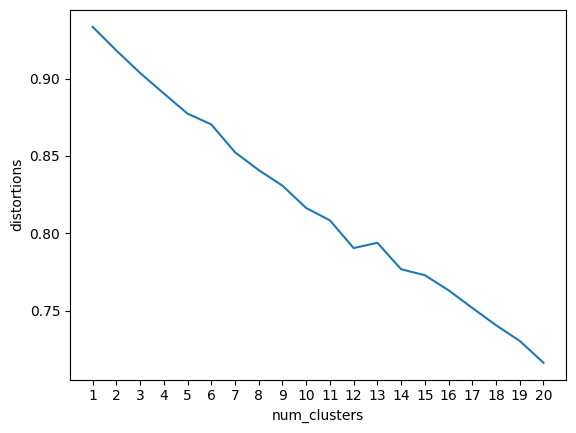

In [472]:
distortions = []
num_clusters_range = range(1, 21)

# Create a list of distortions from the kmeans method
for i in num_clusters_range:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(), i)
    distortions.append(distortion) 
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters_range,
                           'distortions': distortions})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters_range)
plt.show()

In [ ]:
# CONCLUSION: clustering is failed
# (maybe because of noisy words)

In [356]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
# print
# print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [357]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [366]:
# cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

# cluster_names = {0: 'Family, home, war', 
#                  1: 'Police, killed, murders', 
#                  2: 'Father, New York, brothers', 
#                  3: 'Dance, singing, love', 
#                  4: 'Killed, soldiers, captain'}

cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = str(i)

In [445]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=key_list)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], # color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

ValueError: All arrays must be of the same length

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

In [ ]:
# N-grams !!!!

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

# ideas from datacamp

In [ ]:
# NAIVE BAYES -- the best classifier for texts

# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Training and testing the "fake news" model with CountVectorizer

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


In [ ]:
# Training and testing the "fake news" model with TfidfVectorizer

# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


In [ ]:
# basic features:
#     - number of words
#     - number of charachters
#     - average length of words

#     - number of sentences
#     - number of paragraphs
#     - number of words starting with capitals


# text features
# word features

# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

In [ ]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

In [ ]:
# lemmatization = convert words into its base form

# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

In [ ]:
# part-of-speech (POS) tagging


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

In [ ]:
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

In [ ]:
# n-grams

In [ ]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

In [ ]:
# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

In [ ]:
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

In [ ]:
'''
(?)
    - to predict by program length, in what time the candidate nominates
    - to classify programs by quantitative features 
'''

In [ ]:
'''
QUESTIONS:
    - is clustering working on stemmed_words, not on original?
    - how to cut the top of noisy words?

IDEAS:
    - to cluster programs for 1st nomination and for 2+ nominations (+, but no sense)
    - to cluster programs for clusters of persons !!!
'''